In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

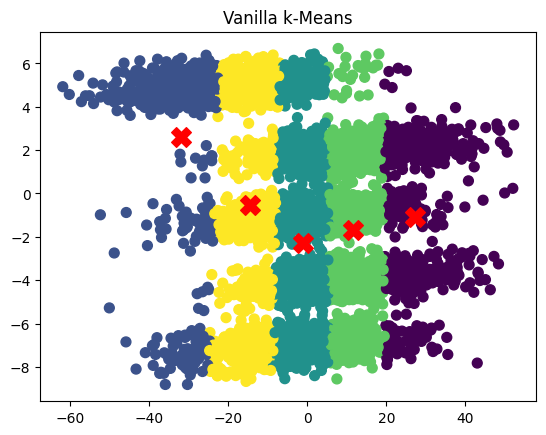

In [4]:
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')

# Q2: initialize k-means algorithm
initial_matrix = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
kmeans = KMeans(n_clusters=5, init=initial_matrix, n_init=1, max_iter=100)
kmeans.fit(data)

# Q3: plot the results
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Vanilla k-Means')
plt.show()

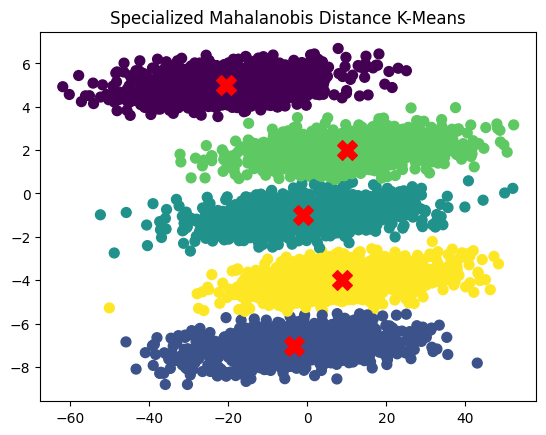

first principle component of the aggregate data: [[ 0.99838317 -0.05684225]]
first principle component of cluster 1:  [[0.99993527 0.01137789]]
first principle component of cluster 2:  [[0.99992533 0.01222027]]
first principle component of cluster 3:  [[0.99990986 0.01342629]]
first principle component of cluster 4:  [[0.99993306 0.01157047]]
first principle component of cluster 5:  [[0.99989374 0.01457781]]


In [5]:
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')

# initialize k-means algorithm
initial_matrix = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

# define P matrix
P = np.array([[10, 0.5], [-10, 0.25]])

# (P^T P)^{-1}
PtP_inv = np.linalg.inv(P.T @ P)

# Define Mahalanobis distance
def mahalanobis_distance(a, b, PtP):
    diff = a - b
    return np.sqrt(diff.T @ PtP @ diff)

# Q5: Implement a specialized k-means with the above Mahalanobis Distance
def specialized_kmeans(data, initial_matrix, PtP, max_iter=100):
    centroids = initial_matrix
    for k in range(max_iter):
        distances = np.zeros((data.shape[0], centroids.shape[0]))
        for i, point in enumerate(data):
            for j, centroid in enumerate(centroids):
                distances[i, j] = mahalanobis_distance(point, centroid, PtP)

        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(centroids.shape[0])])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

centroids, labels = specialized_kmeans(data, initial_matrix, PtP_inv)

plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('Specialized Mahalanobis Distance K-Means')
plt.show()

def calculate_first_principle(data, n_components=1):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca.components_

# Q6: Calculate and print out the first principle component of the aggregate data
all_first_principle_component = calculate_first_principle(data)
print(f"first principle component of the aggregate data: {all_first_principle_component}")

# Q7: Calculate and print out the first principle components of each cluster.
cluster_first_principle_components = []
for cluster_id in np.unique(labels):
    cluster_data = data[labels == cluster_id]
    pca_component = calculate_first_principle(cluster_data)
    cluster_first_principle_components.append(pca_component)
    print(f"first principle component of cluster {cluster_id + 1}: ", pca_component)